In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.preprocessing as sk_pre
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Populating the interactive namespace from numpy and matplotlib


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
dataset = pd.read_csv(r'C:\Users\sahus\Documents\Micron\caravan-insurance-challenge.csv')

In [42]:
dataset.isnull().sum() #no missing values
len(dataset.columns) #we have 87 columns
dataset.describe(include='O') #one categorical column
dataset.describe(include='all') #86 numerical colummn

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,NaN,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,NaN,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [43]:
from sklearn.metrics.pairwise import pairwise_distances

In [54]:
corr = dataset.corr()
cmap = sns.diverging_palette(5,250,as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap,axis=1).set_properties(**{'max-width':'80px','font-size':'10pt'}).set_caption('Hover to magnify').set_precision(2).set_table_styles(magnify())
    
    

In [85]:
corr = dataset.corr().abs()
high_corr = np.where(corr>0.65) # we can tweak this later if we dont have good accuracy 0.65-7 is considered as strong
high_corr_val = [(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
corr_dict = dict(high_corr_val)
drop_list = [feature for feature in corr_dict.values()]
#we have 32 values to be dropped.
dataset_bkp = dataset.copy() # creating a backup, so no problem later

In [87]:
dataset_bkp = dataset_bkp.drop(drop_list,axis=1) # droping the highly correlated features

In [89]:
data = dataset_bkp.copy()


57

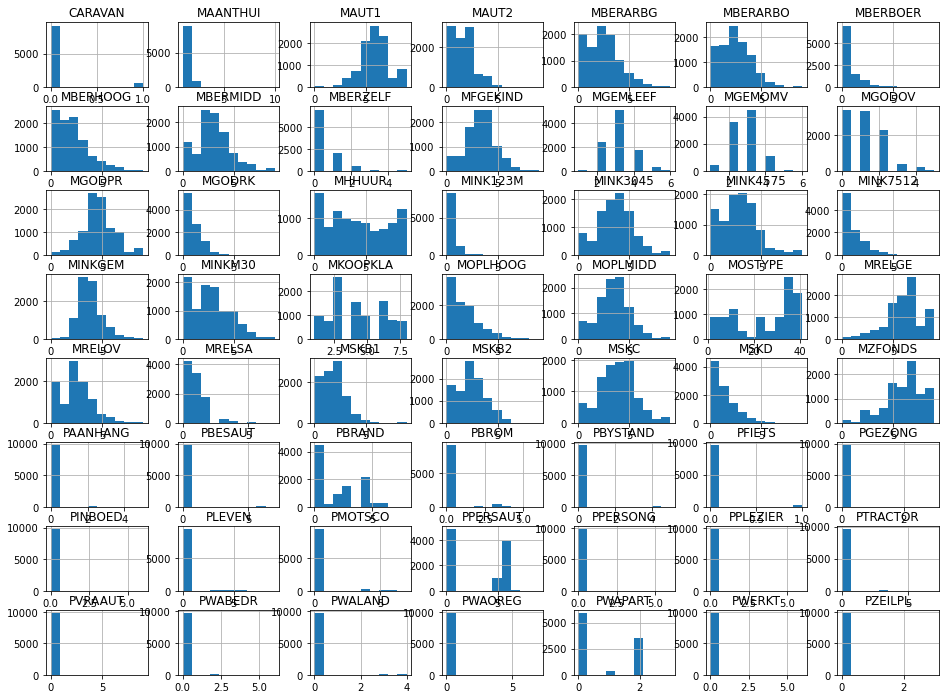

In [91]:
data.hist(figsize=(16,12)) #distribution of each features
plt.show()

In [142]:
pd.crosstab(data.ORIGIN,data.CARAVAN)

CARAVAN,0,1
ORIGIN,,
test,3762,238
train,5474,348


In [140]:
train_data = data[data['ORIGIN']=='train']
test_data = data[data['ORIGIN']=='test']
_ = train_data.pop('ORIGIN')
_= test_data.pop('ORIGIN')
y_base = train_data.pop('CARAVAN')
y_val = test_data.pop('CARAVAN')

In [147]:
pd.DataFrame(data.nunique()).T
pd.DataFrame(train_data.nunique()).T
pd.DataFrame(test_data.nunique()).T

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,MRELOV,...,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND
0,40,9,6,6,9,10,6,10,8,10,...,8,6,3,3,9,3,6,2,6,5


In [207]:
Scaler = sk_pre.StandardScaler()

In [209]:
X_standard = Scaler.fit_transform(train_data)
X_standard

array([[ 0.68090623, -0.27257995,  0.40669664, ..., -0.16094435,
        -0.0764164 , -0.11633332],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.16094435,
        -0.0764164 , -0.11633332],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.16094435,
        -0.0764164 , -0.11633332],
       ...,
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.16094435,
        -0.0764164 , -0.11633332],
       [ 0.75875388, -0.27257995,  0.40669664, ..., -0.16094435,
        -0.0764164 , -0.11633332],
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.16094435,
        -0.0764164 , -0.11633332]])

In [232]:

y = np.vstack(data['CARAVAN'][data['ORIGIN']=='train'].values)
print(X_standard.shape,y.shape)

(5822, 55) (5822, 1)


In [452]:
Min_max = sk_pre.MinMaxScaler()
X_min_max = Min_max.fit_transform(train_data[selected])
X_min_max.shape # this is standardised by min_max_scaler we will use later to check if less accuracy

(5822, 16)

In [453]:
X_train,X_test,y_train,y_test = train_test_split(X_min_max,y,test_size=0.2,random_state=42)
#X_train,X_test,y_train,y_test = train_test_split(X_min_max,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4657, 16) (1165, 16) (4657, 1) (1165, 1)


In [409]:
np.unique(y_train,return_counts=True) #
np.count_nonzero(y_train==1)  #267 1's and rest are zero which is a imbalance data

267

In [454]:
#taking care of oversampling
Oversampling_req =True

if Oversampling_req:
    sm = SMOTE()
    X_train_prop,y_train_prop = sm.fit_sample(X_train,y_train)
    print(X_train_prop.shape,y_train_prop.shape)
    print(pd.crosstab(y_train_prop,y_train_prop))
else:
    None
    


(8780, 16) (8780,)
col_0     0     1
row_0            
0      4390     0
1         0  4390


In [455]:
doPCA = False
if doPCA:
    pca = PCA(svd_solver='randomized',n_components=10,random_state=42)
    pca_x = pca.fit(X_train_prop)
    X_train_pca = pca.transform(X_train_prop)
    X_test_pca = pca.transform(X_test)
   #print(pca.components_)
   #print(pca.explained_variance_)
   #print(pca.explained_variance_ratio_)
   #print(pca.mean_)
    print(pca.n_components_)
    print(pca.noise_variance_)
    plt.figure(1,figsize=(8,4.5))
    plt.clf()
    plt.axes([.2,.2,.7,.7])
    plt.plot(pca.explained_variance_,linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_varaince')
    plt.show()
else:
    X_train_pca = X_train_prop
    X_test_pca = X_test
    
#using PCA, it inferred that only 10 features are of inportant       

In [392]:
import warnings
warnings.filterwarnings('ignore')

In [456]:
#Building Models
#DecisionTree
DT_clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=10,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,max_leaf_nodes=None,min_impurity_split=1e-07)
DT_clf.fit(X_train_pca,y_train_prop)
DT_clf_pred = DT_clf.predict(X_test_pca)

In [457]:
#Naive Bayes
NB_clf = BernoulliNB()
NB_clf.fit(X_train_pca,y_train_prop)
NB_clf_pred = NB_clf.predict(X_test_pca)


In [458]:
#LogisticRegression
Log_clf = LogisticRegression(max_iter=1000,random_state=42,verbose=2,class_weight='balanced')
Log_clf.fit(X_train_pca,y_train_prop)
Log_clf_pred = Log_clf.predict(X_test_pca)
print(Log_clf.coef_)
print(Log_clf.intercept_)

[[ 1.73099313  0.68698476  0.87435074 -0.8237917  -0.42950597  0.66463489
  -0.64704071  0.36609882  0.64618069 -0.36020636  1.04805689 -1.07169424
  -0.13956739  0.09319622  0.99836574 -0.64785732]]
[-2.37904959]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [459]:
#RandomForest
RF_clf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=15,min_samples_split=2,min_samples_leaf=
                               1,min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,min_impurity_split=1e-07,
                               bootstrap=True,oob_score=False,n_jobs=1,random_state=42,verbose=1,class_weight=None)
RF_clf.fit(X_train_pca,y_train_prop)
RF_clf_pred = RF_clf.predict(X_test_pca)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [460]:
#AdaboostClassifier
ADaB_clf = AdaBoostClassifier(n_estimators=100)
ADaB_clf.fit(X_train_pca,y_train_prop)
ADaB_clf_pred = ADaB_clf.predict(X_test_pca)

In [461]:
#Extratreecalssifier
ET_clf = ExtraTreesClassifier(n_estimators=250,random_state=42)
ET_clf.fit(X_train_pca,y_train_prop)
ET_clf_pred = ET_clf.predict(X_test_pca)


In [462]:
#SVMclassifier
SVM_clf = SVC(C=10,gamma='auto',kernel='rbf',max_iter=-1,probability=True,random_state=42,verbose=True)
SVM_clf.fit(X_train_pca,y_train_prop)
SVM_clf_pred = SVM_clf.predict(X_test_pca)

[LibSVM]

In [463]:
dct1 = {'DecisionTreeClassifier':DT_clf_pred,'Naive Byes':NB_clf_pred,'LogisticRegression':Log_clf_pred,
       'RandomForestClassifier':RF_clf_pred,'AdaBoostClassifier':ADaB_clf_pred,'ExtraTreesClassifier':ET_clf_pred,
       'SVC':SVM_clf_pred}

score_dict = {key:accuracy_score(y_test,value) for key,value in dct1.items()}

#this is all with PCA
#with standardscaler Extratrees performed best with 85%  
#withminmax scaler adaboost performed better

In [464]:
min_max_list = [('ExtraTreesClassifier', 0.8798283261802575),
 ('RandomForestClassifier', 0.848068669527897),
 ('DecisionTreeClassifier', 0.7261802575107296),
 ('AdaBoostClassifier', 0.7193133047210301),
 ('SVC', 0.7133047210300429),
 ('LogisticRegression', 0.688412017167382),
 ('Naive Byes', 0.6523605150214592)]

In [465]:

#without PCA models performed better
without_PCA_list = [('ExtraTreesClassifier', 0.9047210300429185),
 ('RandomForestClassifier', 0.9012875536480687),
 ('AdaBoostClassifier', 0.8969957081545065),
 ('DecisionTreeClassifier', 0.8618025751072962),
 ('SVC', 0.7502145922746781),
 ('LogisticRegression', 0.7270386266094421),
 ('Naive Byes', 0.7261802575107296)]

best_25_features = {'DecisionTreeClassifier': 0.8618025751072962,
 'Naive Byes': 0.7021459227467811,
 'LogisticRegression': 0.6978540772532189,
 'RandomForestClassifier': 0.903862660944206,
 'AdaBoostClassifier': 0.9055793991416309,
 'ExtraTreesClassifier': 0.9072961373390558,
 'SVC': 0.751931330472103}

best_15_features = {'DecisionTreeClassifier': 0.8566523605150215,
 'Naive Byes': 0.6849785407725322,
 'LogisticRegression': 0.6969957081545064,
 'RandomForestClassifier': 0.9055793991416309,
 'AdaBoostClassifier': 0.9012875536480687,
 'ExtraTreesClassifier': 0.9107296137339056,
 'SVC': 0.7536480686695279}

with 15 best features the models perform the best.

In [342]:
#lets see if we can improve anymore the model performance
Features_imp = RF_clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in RF_clf.estimators_],axis=0)

In [367]:
imp = dict(sorted(zip(map(lambda x:round(x,4),RF_clf.feature_importances_),train_data.columns),reverse=True))

   
    


In [451]:
selected = list(imp.values())[:16]

{'DecisionTreeClassifier': 0.8489270386266095,
 'Naive Byes': 0.6978540772532189,
 'LogisticRegression': 0.6935622317596567,
 'RandomForestClassifier': 0.9004291845493563,
 'AdaBoostClassifier': 0.896137339055794,
 'ExtraTreesClassifier': 0.9098712446351931,
 'SVC': 0.7527896995708154}